<a href="https://colab.research.google.com/github/matesans0108/Data-Analyst-Task5/blob/main/task5_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style='whitegrid')

In [10]:
# Load dataset (ensure train.csv is in same directory or provide full path)
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Basic info and missing values
print('Shape:', df.shape)
display(df.info())
display(df.describe(include='all').T)
display(df.isnull().sum())

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract title from name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# Group rare titles
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df[['FamilySize','Title']].head()

,FamilySize,Title
0,2,Mr
1,2,Mrs
2,1,Miss
3,2,Mrs
4,1,Mr


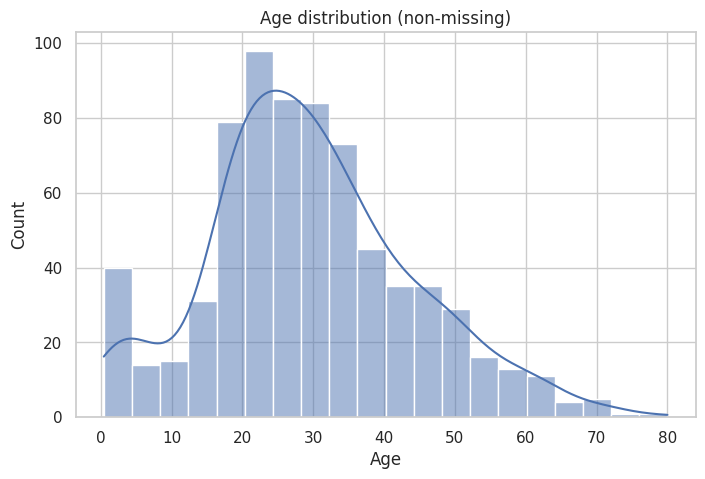

Observation: Age has a wide range with many passengers between 20-40. There are missing Age values to handle later.


In [13]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age distribution (non-missing)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Observation
print('Observation: Age has a wide range with many passengers between 20-40. There are missing Age values to handle later.')

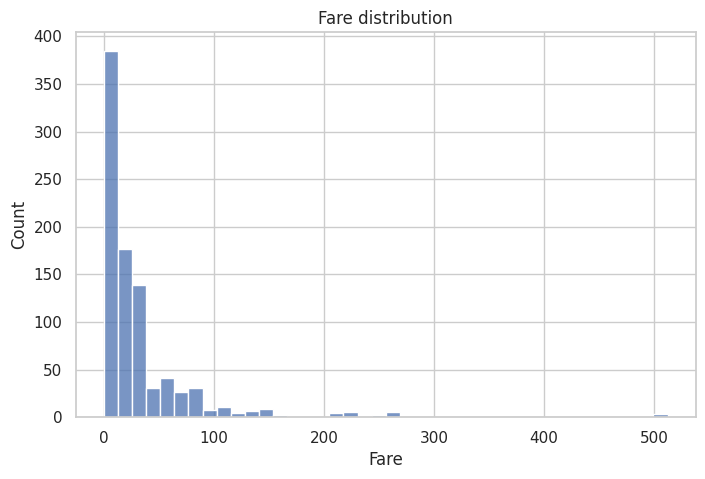

Observation: Fare is right-skewed; a few passengers paid very high fares.


In [14]:
# Fare distribution (log scale for clarity)
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.show()

print('Observation: Fare is right-skewed; a few passengers paid very high fares.')

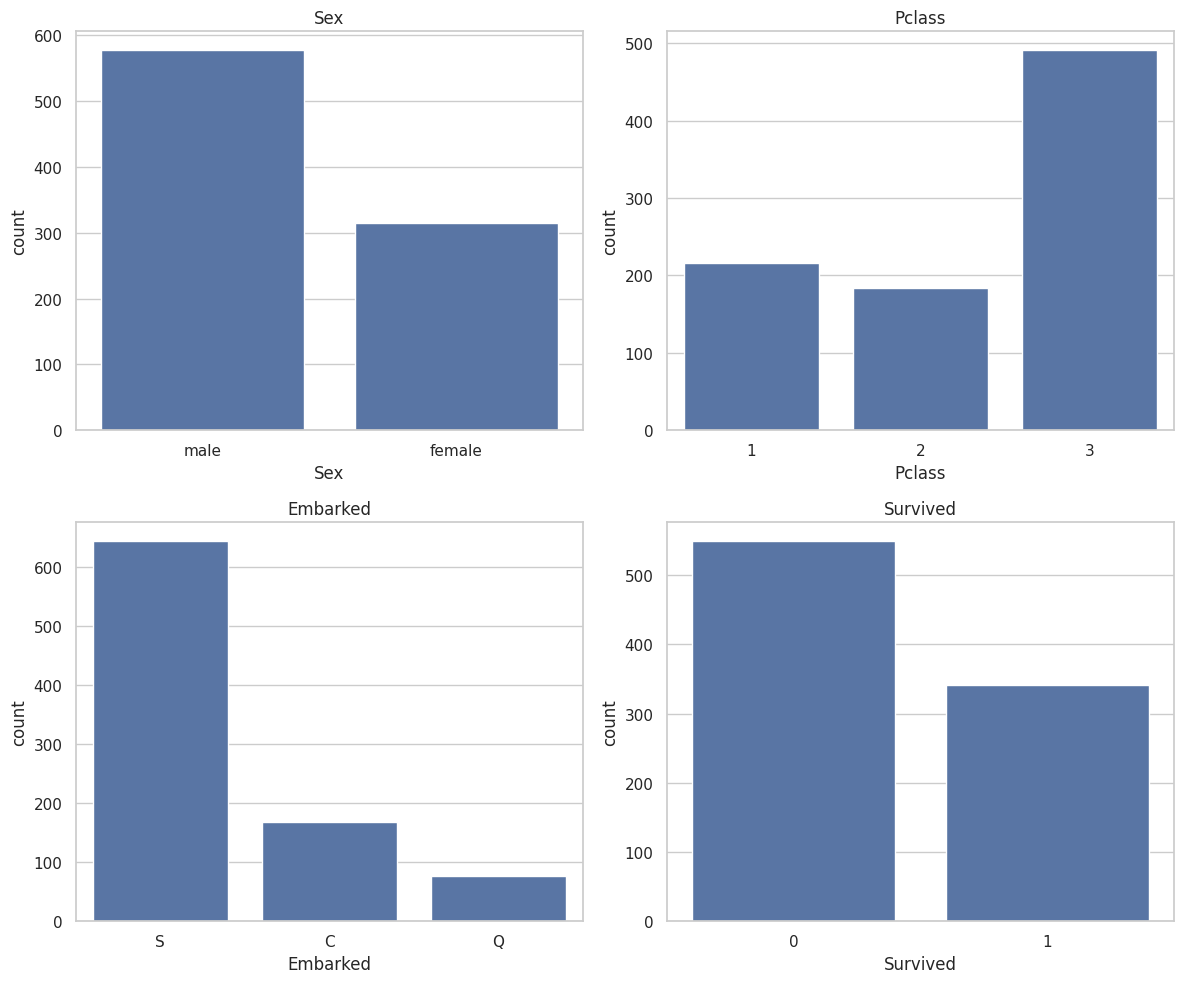

Observation: More passengers are in Pclass 3; survival count is lower than non-survived (0 means not survived).


In [15]:
# Count plots for categorical variables
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.countplot(x='Sex', data=df, ax=axes[0,0])
axes[0,0].set_title('Sex')

sns.countplot(x='Pclass', data=df, ax=axes[0,1])
axes[0,1].set_title('Pclass')

sns.countplot(x='Embarked', data=df, ax=axes[1,0])
axes[1,0].set_title('Embarked')

sns.countplot(x='Survived', data=df, ax=axes[1,1])
axes[1,1].set_title('Survived')

plt.tight_layout()
plt.show()

print('Observation: More passengers are in Pclass 3; survival count is lower than non-survived (0 means not survived).')

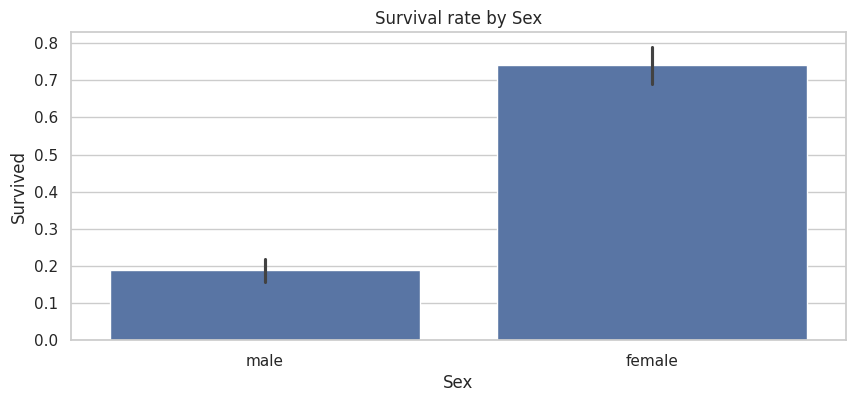

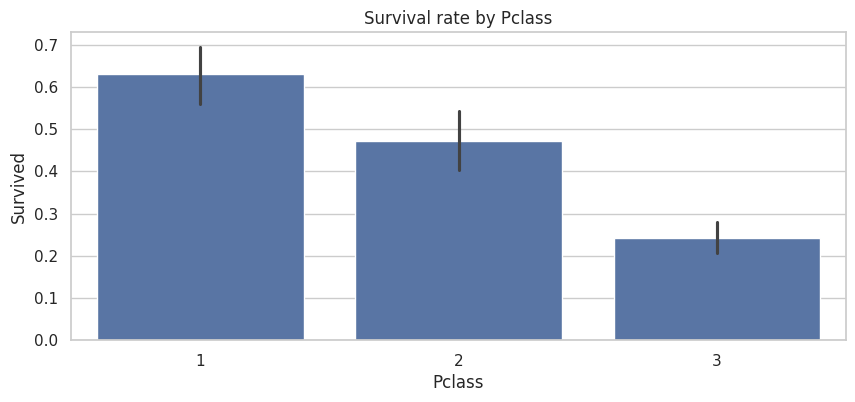

Observation: Females have higher survival rates. Lower class (Pclass=3) has lower survival rates.


In [16]:
# Survival rate by Sex and Pclass
plt.figure(figsize=(10,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by Sex')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival rate by Pclass')
plt.show()

print('Observation: Females have higher survival rates. Lower class (Pclass=3) has lower survival rates.')

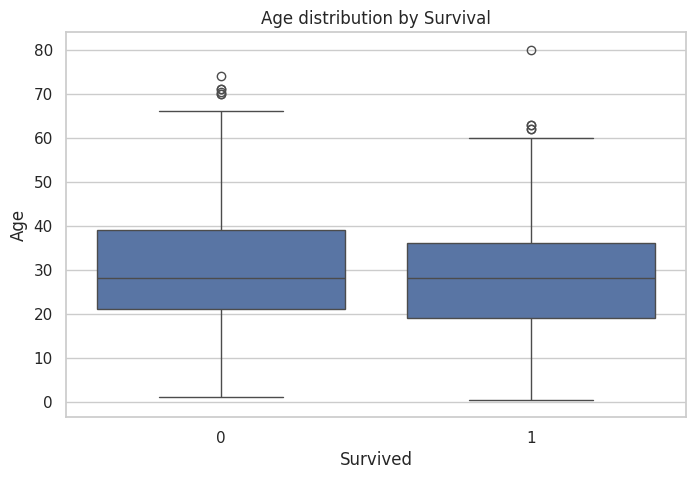

Observation: Median age of survivors appears slightly lower; infants and children show higher survival in some cases.


In [17]:
# Age vs Survival (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age distribution by Survival')
plt.show()

print('Observation: Median age of survivors appears slightly lower; infants and children show higher survival in some cases.')

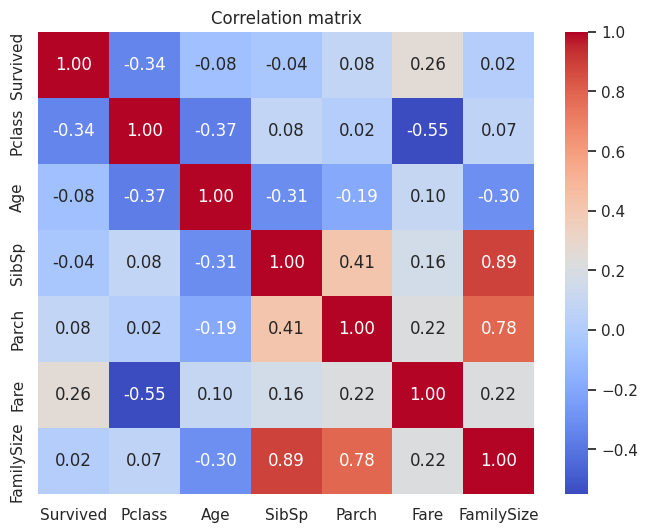

Observation: Pclass negatively correlates with Fare and positively with survival negative; Fare and Pclass show relationship.


In [18]:
# Correlation heatmap for numeric features
numeric_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

print('Observation: Pclass negatively correlates with Fare and positively with survival negative; Fare and Pclass show relationship.')

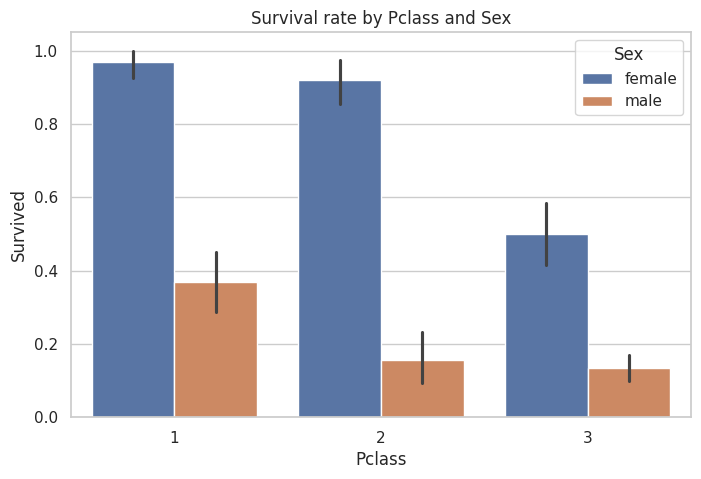

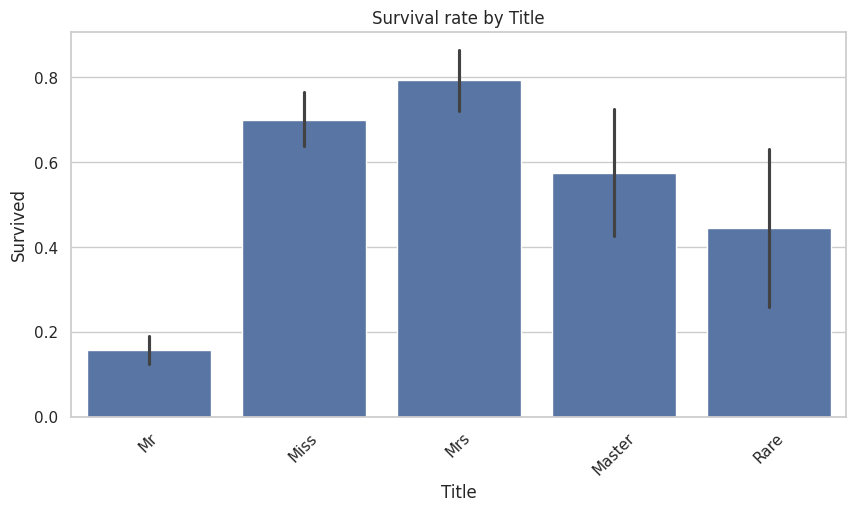

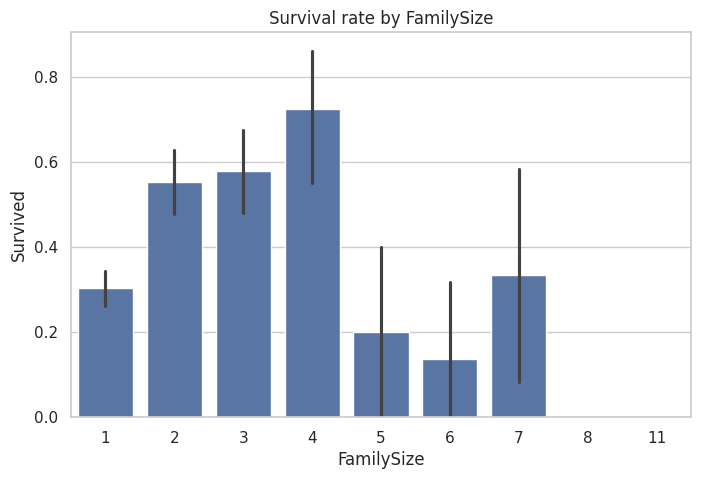

Observation: Within each Pclass, females have higher survival. Titles like Mrs/Miss show higher survival rates; very large families had lower survival in general.


In [19]:
# Survival by Pclass and Sex
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival rate by Pclass and Sex')
plt.show()

# Survival by Title and FamilySize (grouped)
plt.figure(figsize=(10,5))
sns.barplot(x='Title', y='Survived', data=df, order=df['Title'].value_counts().index)
plt.title('Survival rate by Title')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival rate by FamilySize')
plt.show()

print('Observation: Within each Pclass, females have higher survival. Titles like Mrs/Miss show higher survival rates; very large families had lower survival in general.')